
2022年のイグ・ノーベル経済学賞は、「才能 vs 運: 成功と失敗におけるランダム性の役割」という論文に対して贈られました。

論文のポイント
この論文では、成功や失敗が必ずしも個人の能力や努力だけで決まるのではなく、運が大きな役割を果たしているという点に注目しています。

才能だけでなく運も重要: 一般的に、成功者は高い能力や努力をした結果だと考えられがちですが、この論文では、運の要素がどれだけ重要かを数学的にモデル化し、分析しています。
ランダム性の影響: 成功には、個人の努力や能力に加えて、市場の変動、偶然の出会いなど、ランダムな要素が大きく影響することを示唆しています。
成功者の自己評価: 成功者は、自分の成功を過度に自分の能力に帰属させがちですが、この論文は、運の要素を考慮する重要性を指摘しています。

元のモデルはNetlogoで行われている
今回はpythonで書かれたこちらのコードをそのままコピペした
https://github.com/KentAnak/TvLSimulator


In [ ]:
import numpy as np

class Human():
    def __init__(self):
        self.talent = np.random.normal(0.6, 0.1)
        self.wealth = 10
        self.lucky_cnt = 0
        self.unlucky_cnt = 0

    def face_event(self):
        freq = np.random.poisson(lam=0.45)
        for i in range(1,freq):
            lucky = bool(np.random.randint(0,2))
            if lucky:
                if(np.random.random() < self.talent):
                    self.wealth *= 2
                self.lucky_cnt +=1
            else:
                self.wealth =  self.wealth/2
                self.unlucky_cnt +=1

def run_simulation(class_arg):
    population = []
    for n in range(1000):
        population.append(class_arg())

    for i in range(80):
        for man in population:
            man.face_event()

    # print(population[0])
    # print(population[0].wealth)
    # print(population[0].lucky_cnt)
    # print(population[0].unlucky_cnt)
    return population

population = run_simulation(Human)

富の分布をlogプロット

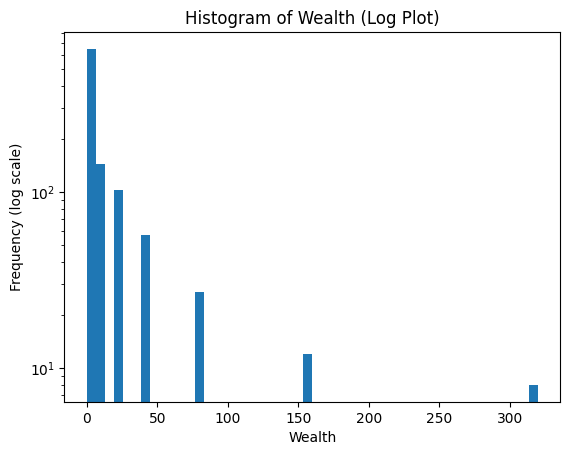

In [ ]:
# prompt: wealth.wealthのヒストグラムをlogplotでグラフ化

import matplotlib.pyplot as plt

wealths = [man.wealth for man in population]

plt.hist(wealths, bins=50, log=True)
plt.xlabel("Wealth")
plt.ylabel("Frequency (log scale)")
plt.title("Histogram of Wealth (Log Plot)")
plt.show()


相関を見ると才能-富より運-富の方が大きい

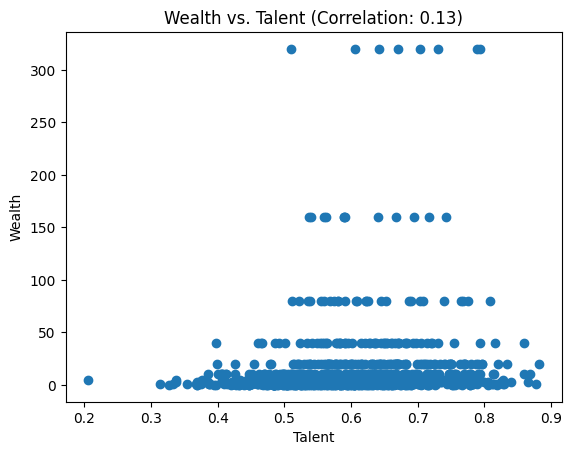

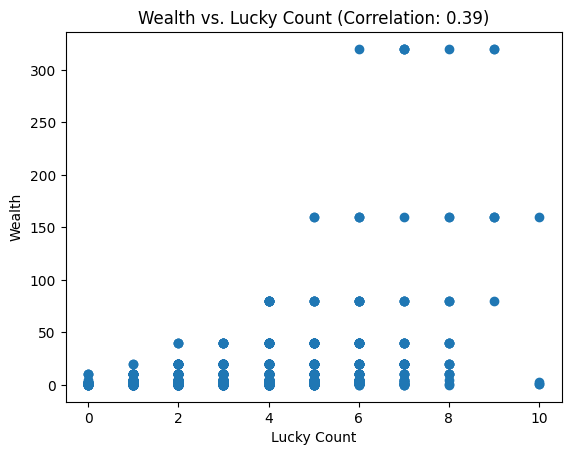

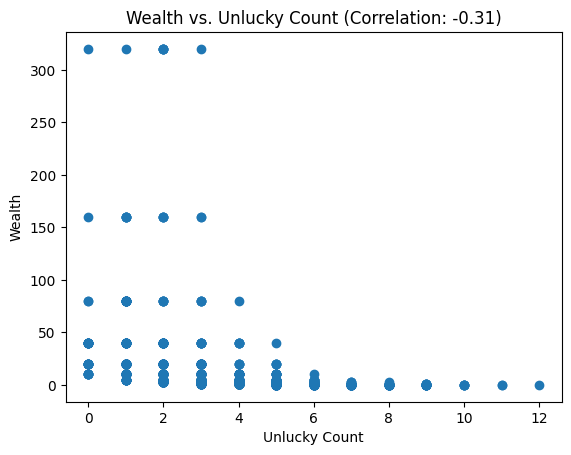

In [ ]:
# prompt: wealthとtalentの相関
# wealthとlucky_cntの相関
# wealthとunlucky_cntの相関

import numpy as np
import matplotlib.pyplot as plt

# ... (Previous code from the provided context) ...

wealths = [man.wealth for man in population]
talents = [man.talent for man in population]
lucky_counts = [man.lucky_cnt for man in population]
unlucky_counts = [man.unlucky_cnt for man in population]

# Wealth vs. Talent Correlation
correlation_wealth_talent = np.corrcoef(wealths, talents)[0, 1]
plt.scatter(talents, wealths)
plt.xlabel("Talent")
plt.ylabel("Wealth")
plt.title(f"Wealth vs. Talent (Correlation: {correlation_wealth_talent:.2f})")
plt.show()

# Wealth vs. Lucky Count Correlation
correlation_wealth_lucky = np.corrcoef(wealths, lucky_counts)[0, 1]
plt.scatter(lucky_counts, wealths)
plt.xlabel("Lucky Count")
plt.ylabel("Wealth")
plt.title(f"Wealth vs. Lucky Count (Correlation: {correlation_wealth_lucky:.2f})")
plt.show()

# Wealth vs. Unlucky Count Correlation
correlation_wealth_unlucky = np.corrcoef(wealths, unlucky_counts)[0, 1]
plt.scatter(unlucky_counts, wealths)
plt.xlabel("Unlucky Count")
plt.ylabel("Wealth")
plt.title(f"Wealth vs. Unlucky Count (Correlation: {correlation_wealth_unlucky:.2f})")
plt.show()


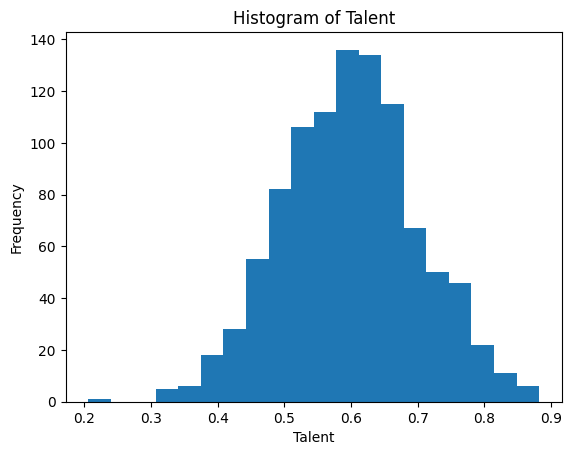

In [ ]:
# prompt: talentのヒストグラム

talents = [man.talent for man in population]

plt.hist(talents, bins=20)
plt.xlabel("Talent")
plt.ylabel("Frequency")
plt.title("Histogram of Talent")
plt.show()


実際の競争は選抜が行われ才能がある人同士で行われることが多いため
正規分布のtalent１００回の最大値に選抜を行うとtalent-富の相関はほとんどなくなった．

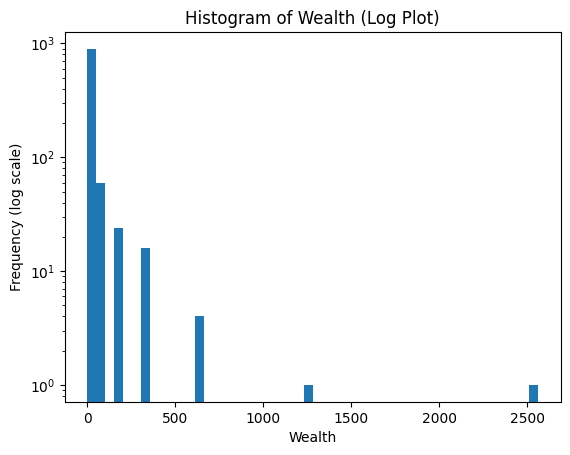

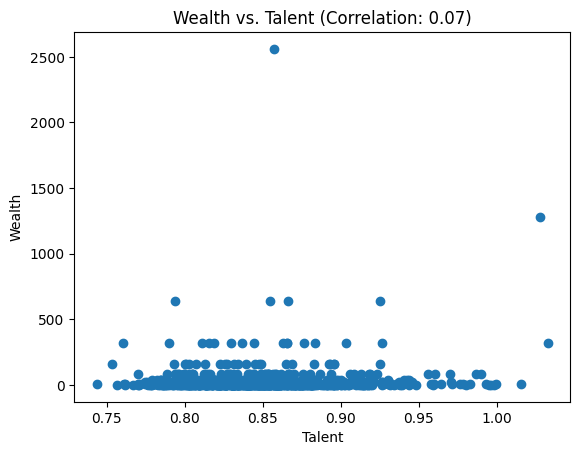

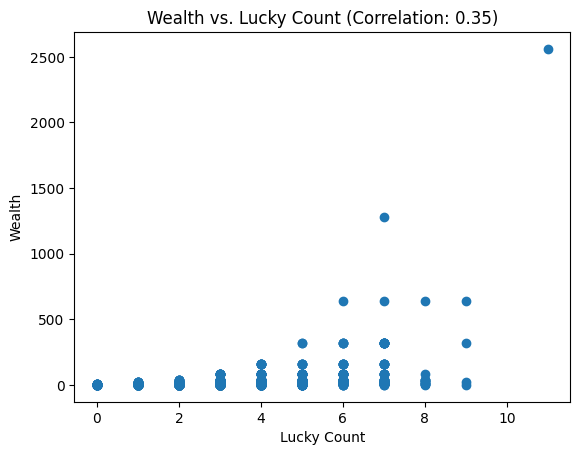

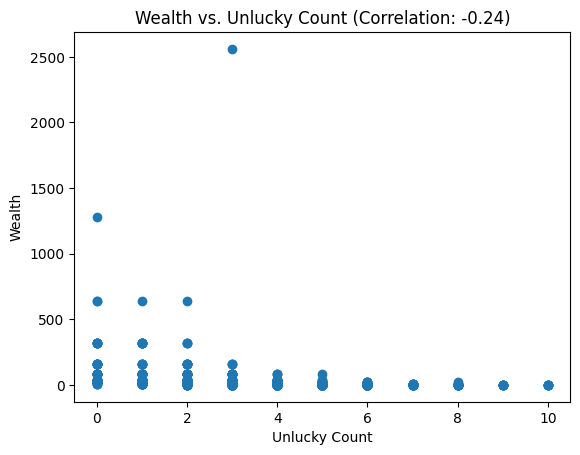

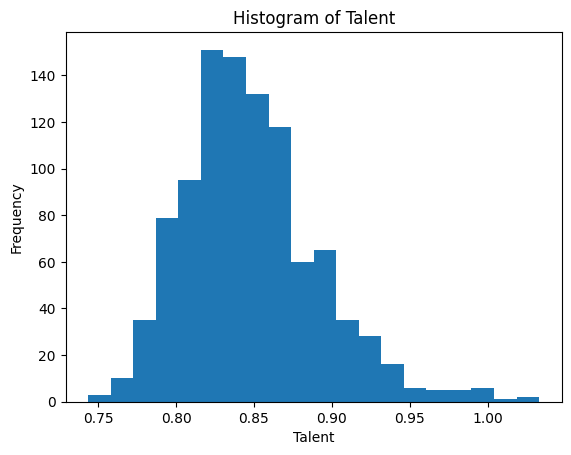

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class Human():
    def __init__(self):
        # prompt: Human classのtalentをnp.random.normal(0.6, 0.1, None)１００回行った最大値に変更
        talent_list = []
        for _ in range(100):
          talent_list.append(np.random.normal(0.6, 0.1))
        self.talent = max(talent_list)
        self.wealth = 10
        self.lucky_cnt = 0
        self.unlucky_cnt = 0

    def face_event(self):
        freq = np.random.poisson(lam=0.45)
        for i in range(1,freq):
            lucky = bool(np.random.randint(0,2))
            if lucky:
                if(np.random.random() < self.talent):
                    self.wealth *= 2
                self.lucky_cnt +=1
            else:
                self.wealth =  self.wealth/2
                self.unlucky_cnt +=1

def run_simulation(class_arg):
    population = []
    for n in range(1000):
        population.append(class_arg())

    for i in range(80):
        for man in population:
            man.face_event()

    # print(population[0])
    # print(population[0].wealth)
    # print(population[0].lucky_cnt)
    # print(population[0].unlucky_cnt)
    return population

population = run_simulation(Human)



wealths = [man.wealth for man in population]

plt.hist(wealths, bins=50, log=True)
plt.xlabel("Wealth")
plt.ylabel("Frequency (log scale)")
plt.title("Histogram of Wealth (Log Plot)")
plt.show()



# ... (Previous code from the provided context) ...

wealths = [man.wealth for man in population]
talents = [man.talent for man in population]
lucky_counts = [man.lucky_cnt for man in population]
unlucky_counts = [man.unlucky_cnt for man in population]

# Wealth vs. Talent Correlation
correlation_wealth_talent = np.corrcoef(wealths, talents)[0, 1]
plt.scatter(talents, wealths)
plt.xlabel("Talent")
plt.ylabel("Wealth")
plt.title(f"Wealth vs. Talent (Correlation: {correlation_wealth_talent:.2f})")
plt.show()

# Wealth vs. Lucky Count Correlation
correlation_wealth_lucky = np.corrcoef(wealths, lucky_counts)[0, 1]
plt.scatter(lucky_counts, wealths)
plt.xlabel("Lucky Count")
plt.ylabel("Wealth")
plt.title(f"Wealth vs. Lucky Count (Correlation: {correlation_wealth_lucky:.2f})")
plt.show()

# Wealth vs. Unlucky Count Correlation
correlation_wealth_unlucky = np.corrcoef(wealths, unlucky_counts)[0, 1]
plt.scatter(unlucky_counts, wealths)
plt.xlabel("Unlucky Count")
plt.ylabel("Wealth")
plt.title(f"Wealth vs. Unlucky Count (Correlation: {correlation_wealth_unlucky:.2f})")
plt.show()


talents = [man.talent for man in population]

plt.hist(talents, bins=20)
plt.xlabel("Talent")
plt.ylabel("Frequency")
plt.title("Histogram of Talent")
plt.show()
